---------------------
**Key Concepts**

- Use CNN to recognize the hand-written digits.
  - A convolutional neural network (CNN or ConvNet) is a network architecture for deep learning that learns directly from data. **CNNs are particularly useful for finding patterns in images to recognize objects, classes, and categories. They can also be quite effective for classifying audio, time-series, and signal data.**
  - CNN is a class of neural networks that specializes in processing data that has a **grid-like topology, such as an image**.
  - CNN essentially enables sight to computers
  - CNN Architecture: A convolutional layer, a pooling layer, and a fully connected layer.
   - Convulitonal layer: The core building block of the CNN. It carries the main portion of the network’s computational load. This layer performs a dot product between two matrices, where one matrix is the set of learnable parameters otherwise known as a kernel, and the other matrix is the restricted portion of the receptive field.
   - Pooling layer: It replaces the output of the network at certain locations by deriving a summary statistic of the nearby outputs. This helps in reducing the spatial size of the representation, which decreases the required amount of computation and weights. The pooling operation is processed on every slice of the representation individually.
   - Fully connected layer: Neurons in this layer have full connectivity with all neurons in the preceding and succeeding layer as seen in regular FCNN. This is why it can be computed as usual by a matrix multiplication followed by a bias effect.

The FC layer helps to map the representation between the input and the output.

![](https://miro.medium.com/v2/resize:fit:786/format:webp/1*kkyW7BR5FZJq4_oBTx3OPQ.png)

**Project Highlights**
- Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.
- The training data set, (train.csv), has 785 columns. **The first column, called "label", is the digit that was drawn by the user.** The rest of the columns contain the pixel-values of the associated image.
---------------------

### **Data Import and Libraries Loading**

In [1]:
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.manifold import MDS, TSNE

import tensorflow as tf
from tensorflow import keras

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
# from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras import  backend as K
from keras.optimizers import Adam ,RMSprop

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head(3)
print(train_df.shape[0])

42000


In [4]:
test_df.head(3)
print(test_df.shape[0])

28000


In [5]:
images = train_df.iloc[0:42000,1:]
labels = train_df.iloc[0:42000,:1]

train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)

Text(0.5, 1.0, '0')

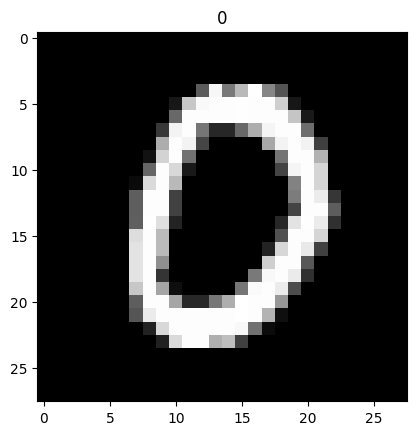

In [6]:
img=train_images.iloc[100].to_numpy()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_labels.iloc[100,0])

### **Model Training**
- Use the sklearn.svm module to create a vector classifier.
- Pass the training images and labels to the classifier's fit method, which trains our model.
- The test images and labels are passed to the score method to see how well we trained our model. Fit will return a float between 0-1 indicating our accuracy on the test data set

In [7]:
from sklearn import svm

clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images,test_labels)

0.9747619047619047

This clf score of 0.975 is pretty high. Let's try if we can improve it even more by making some changes to the images themselves.

Text(0.5, 1.0, '0')

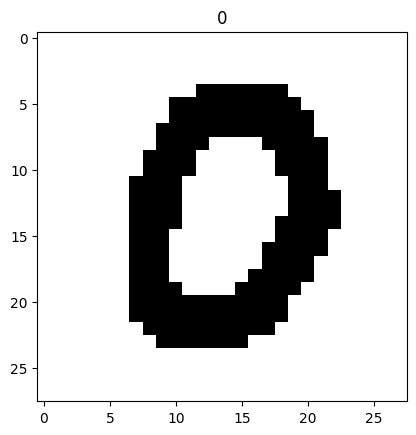

In [8]:
# Transform the gray-sclaed images into black and white
## any pixel with a value simply becomes 1 and everything else remains 0
test_images[test_images>0]=1
train_images[train_images>0]=1

img=train_images.iloc[100].to_numpy().reshape((28,28))
plt.imshow(img,cmap='binary')
plt.title(train_labels.iloc[100,0])

In [9]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images,test_labels)

0.9720238095238095